In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

plt.rcParams['figure.figsize'] = [25, 5] # makes pandas plot wider [width, height]

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/tjjones93/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
scripts = pd.read_csv('./data/seinfeld_scripts.csv')
ep_info = pd.read_csv('./data/episode_info.csv')

In [5]:
text = scripts['Dialogue'][7]
test = sent_tokenize(text)
print(test)

['Well, senator, Id just like to know, what you knew and when you knew it.']


## Extract Jerry's Lines from Season 1, Episodes 1 + 2

In [12]:
season_ids = scripts['SEID'].unique()

d = 'Dialogue'
jerry_lines_s1e1 = {}
def get_ep_1_lines():
    i = 0
    while scripts.loc[i, 'SEID'] == 'S01E01':
        if scripts.loc[i,'Character'] == 'JERRY':
            jerry_lines_s1e1[i] = sent_tokenize(scripts.loc[i,d])
        i += 1
get_ep_1_lines()
# print("Jerry's lines:",len(jerry_lines.keys()))
# print("Total lines from Season 1, Ep. 1:",len(s1e1_lines))
# print(jerry_lines_s1e1)

jerry_lines_s1e2 = {}
def get_ep_2_lines():   
    while scripts.loc[i, 'SEID'] == 'S01E02':
        if scripts.loc[i,'Character'] == 'JERRY':
            jerry_lines_s1e2[i] = sent_tokenize(scripts.loc[i,d])
        s1e1_lines.append(scripts.loc[i,d])
        i += 1
# get_ep_2_lines()
print(jerry_lines_s1e2)

{}


## Remove Stop Words

In [7]:
nltk.download('stopwords')
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tjjones93/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
english_stop_words = stopwords.words('english')

tokens = word_tokenize(text)

## Calculate average compound score of Jerry's lines using Vader Sentiment

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [13]:
def get_avg_comp_score(dialogue):

# finds average compound sentiment score
# compound >= 0.05 == positive
# compound <= -0.05 == negative
# 
# because sentiments can vary wildly from line to line,
# and the sentiment range is -1 to 1,
# the function only returns compound scores >= 0.1 or <= -0.1
# so that we can graph moments in each episode where Jerry's
# emotions are most heightened

    result = {}
    for index,lines in dialogue.items():
        comp = pos = neg = 0
        for line in lines:
            comp += analyzer.polarity_scores(line)['compound']
            # pos += analyzer.polarity_scores(line)['pos']
            # neg += analyzer.polarity_scores(line)['neg']
        if round(comp/(len(lines)),4) >= 0.1 or round(comp/(len(lines)),4) <= -0.1:
            result[index] = round(comp/(len(lines)),4)
    return result

avg_comps_s1e1 = get_avg_comp_score(jerry_lines_s1e1)
print(avg_comps_s1e1)
avg_comps_s1e2 = get_avg_comp_score(jerry_lines_s1e2)
print(avg_comps_s1e2)

{7: 0.5574, 11: 0.2202, 14: 0.2732, 18: 0.2009, 20: -0.296, 22: 0.7761, 24: 0.7684, 26: 0.296, 28: 0.296, 30: 0.2846, 32: 0.1531, 34: 0.3595, 38: -0.2287, 40: 0.4574, 49: 0.636, 55: 0.1638, 68: 0.6795, 72: 0.296, 78: 0.1483, 82: -0.3555, 88: 0.296, 90: 0.282, 92: -0.1804, 101: 0.296, 111: 0.2371, 113: 0.2339, 114: 0.1012, 116: -0.1124, 120: -0.5859, 128: 0.296, 130: 0.3612, 132: 0.2929, 134: 0.4404, 149: -0.5096, 151: -0.1648, 161: 0.8271, 163: 0.4939, 167: 0.2312, 174: 0.4404, 176: 0.4939, 184: 0.6486, 188: 0.1362, 190: 0.296, 192: 0.296, 194: 0.3289, 196: 0.1806, 198: 0.4027, 199: 0.148, 201: -0.5096, 203: 0.4019, 205: 0.4019, 207: 0.296, 218: 0.148, 220: 0.296, 222: 0.1808, 226: 0.296, 232: 0.2732, 240: 0.296, 246: -0.4215, 248: 0.6588, 260: 0.5719, 265: 0.1531, 273: 0.3466, 278: 0.3753, 283: 0.2997, 287: -0.6249, 291: 0.4019, 293: 0.2099, 295: -0.1132, 299: 0.3818, 305: 0.5549, 311: 0.25, 317: 0.1216, 320: 0.1806, 322: 0.3592, 324: -0.296, 326: -0.1938, 331: 0.1531, 333: 0.2646, 33

<AxesSubplot:>

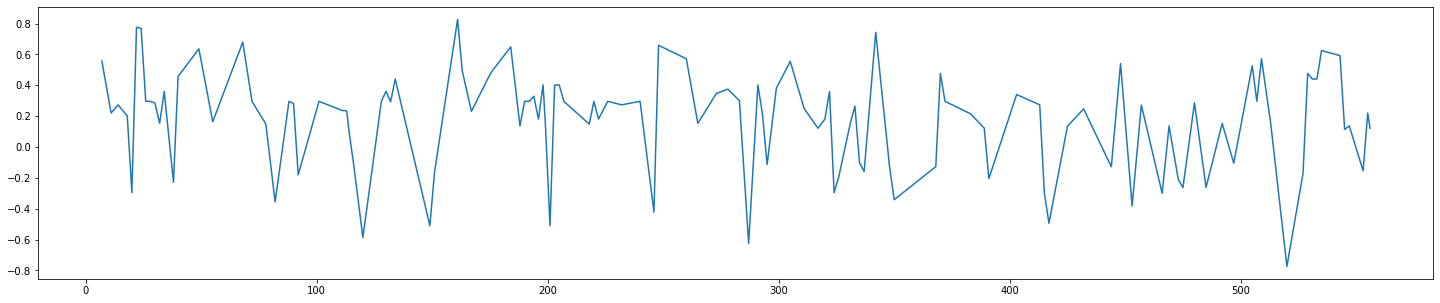

In [276]:
s1 = pd.Series(data=avg_comps_s1e1)
s1.plot()

<AxesSubplot:>

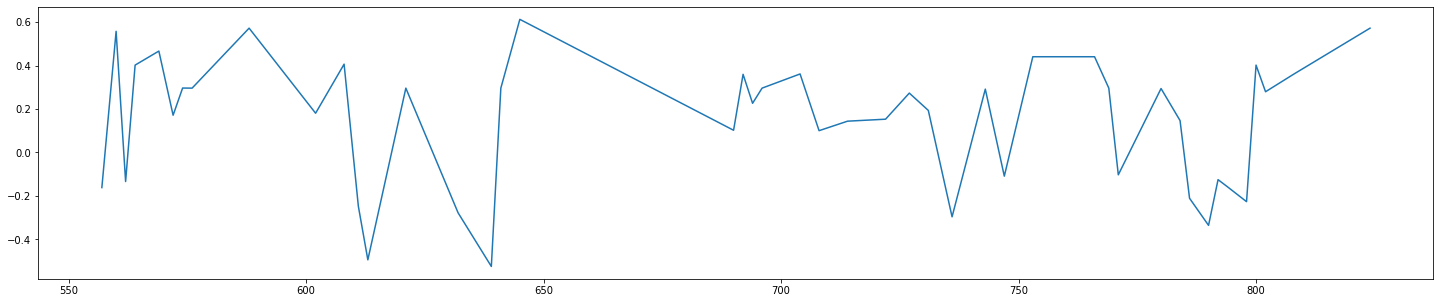

In [272]:
s2 = pd.Series(data=avg_comps_s1e2)
s2.plot()

In [226]:
# these are the compound index numbers that should be removed from the s1e1_emotions dict
indices = list(avg_comps_s1e1.keys())
print(indices)

[7, 11, 14, 18, 20, 22, 24, 26, 28, 30, 32, 34, 38, 40, 49, 55, 68, 72, 78, 82, 88, 90, 92, 101, 111, 113, 114, 116, 120, 128, 130, 132, 134, 149, 151, 161, 163, 167, 174, 176, 184, 188, 190, 192, 194, 196, 198, 199, 201, 203, 205, 207, 218, 220, 222, 226, 232, 240, 246, 248, 260, 265, 273, 278, 283, 287, 291, 293, 295, 299, 305, 311, 317, 320, 322, 324, 326, 331, 333, 335, 337, 342, 348, 350, 368, 370, 372, 383, 389, 391, 403, 413, 415, 417, 425, 432, 444, 448, 453, 457, 466, 469, 473, 475, 480, 485, 492, 497, 505, 507, 509, 513, 520, 527, 529, 531, 533, 535, 543, 545, 547, 553, 555, 556]


## Calculate affect score of Jerry's lines using NRC Lexicon

In [212]:
from nrclex import NRCLex

In [1]:
s1e1_emotions = {}
for index,lines in jerry_lines.items():
    if index in indices:
        for line in lines:
            #print(index,line)
            emotions = NRCLex(line).affect_frequencies
            #print(line,emotions)
        s1e1_emotions[index] = emotions

s1e1_df = {
    'fear': [],
    'anger': [],
    'anticip': [],
    'trust': [],
    'surprise': [],
    'sadness': [],
    'disgust': [],
    'joy': []
}

for line,emotions in s1e1_emotions.items():
    for emotion,i in emotions.items():
        if emotion == 'anticipation' or emotion == 'positive' or emotion == 'negative':
            continue;
        s1e1_df[emotion].append(i)

print(s1e1_emotions)

NameError: name 'jerry_lines' is not defined

In [259]:
index = []
for idx,emo in s1e1_emotions.items():
    index.append(idx)
print(index)

[7, 11, 14, 18, 20, 22, 24, 26, 28, 30, 32, 34, 38, 40, 49, 55, 68, 72, 78, 82, 88, 90, 92, 101, 111, 113, 114, 116, 120, 128, 130, 132, 134, 149, 151, 161, 163, 167, 174, 176, 184, 188, 190, 192, 194, 196, 198, 199, 201, 203, 205, 207, 218, 220, 222, 226, 232, 240, 246, 248, 260, 265, 273, 278, 283, 287, 291, 293, 295, 299, 305, 311, 317, 320, 322, 324, 326, 331, 333, 335, 337, 342, 348, 350, 368, 370, 372, 383, 389, 391, 403, 413, 415, 417, 425, 432, 444, 448, 453, 457, 466, 469, 473, 475, 480, 485, 492, 497, 505, 507, 509, 513, 520, 527, 529, 531, 533, 535, 543, 545, 547, 553, 555, 556]


In [260]:
df = pd.DataFrame(data=s1e1_df, index=index)

In [261]:
print(df)

     fear  anger  anticip  trust  surprise  sadness  disgust  joy
7     0.0    0.0      0.0    0.0       0.0      0.0      0.0  0.0
11    0.0    0.0      0.0    0.5       0.0      0.0      0.0  0.0
14    0.0    0.0      0.0    0.0       0.0      0.0      0.0  0.0
18    0.0    0.0      0.0    1.0       0.0      0.0      0.0  0.0
20    0.0    0.0      0.0    0.0       0.0      0.0      0.0  0.0
..    ...    ...      ...    ...       ...      ...      ...  ...
545   0.0    0.0      0.0    0.0       0.0      0.0      0.0  0.0
547   0.0    0.0      0.0    0.0       0.0      0.0      0.0  0.0
553   0.0    0.0      0.0    0.0       0.0      0.0      0.0  0.0
555   1.0    0.0      0.0    0.0       0.0      0.0      0.0  0.0
556   0.0    0.0      0.0    0.0       0.0      0.0      0.0  0.0

[124 rows x 8 columns]


In [262]:
df.index

Int64Index([  7,  11,  14,  18,  20,  22,  24,  26,  28,  30,
            ...
            529, 531, 533, 535, 543, 545, 547, 553, 555, 556],
           dtype='int64', length=124)

In [263]:
df.columns

Index(['fear', 'anger', 'anticip', 'trust', 'surprise', 'sadness', 'disgust',
       'joy'],
      dtype='object')

<AxesSubplot:>

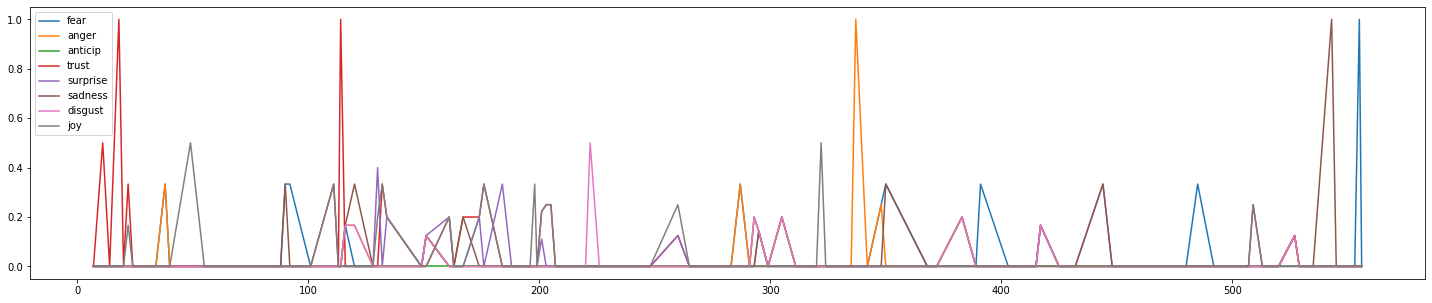

In [264]:
df.plot()

<AxesSubplot:>

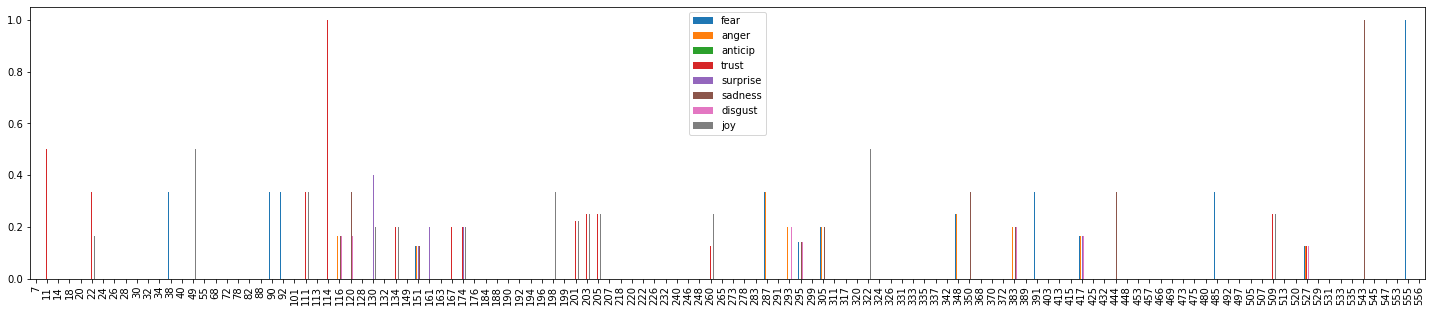

In [268]:
df.plot(kind='bar')